# SARIMA Models

In [17]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa as smt

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/wgsegment/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Autoregressive (AR) Models
An AR model of order $p$, denoted AR($p$), is a model where the current time point is dependent on the previous $p$ time points. Formally, the model is expressed as
$$
X_t = c + \sum_{i=1}^p \alpha_i X_{t-i} + \epsilon_t
$$
where $X_{t-i}$ are lag variables, $c$ is a constant, $\alpha_i$ are paremeters, and $\epsilon_t$ is white noise.

Equivalently, the model can be expressed with lag operators which maps current time points to previous time points. Lag operators $L^i$ are defined by
$$
L^i[X_t] = X_{t-i}
$$
which can be used to give us the expression
$$
\left(1 - \sum_{i=1}^p \alpha_i L^i \right) X_t = c + \epsilon_t
$$

In [172]:
def ar_process(num_steps, p, ar_params, c=0, scale=1):
    """
    Generates AR(p) sample. Fixed the burnin to equal the model order to
    remove dependencies on first p terms of the sample.
    """
    if num_steps < p:
        raise ValueError('Model order cannot exceed number of steps.')
    t = np.arange(num_steps)
    x = np.zeros(num_steps + p)  # The first p terms will not exactly follow the AR model
    
    x[:p] = np.random.normal(size=p)  # Initialize first p points from standard Gaussian
    x[p:] = c + np.random.normal(scale=scale, size=num_steps)  # Add shifts and white noise beforehand
    
    for i in t:
        x[i+p] += (ar_params @ x[i:i+p][::-1])
    
    return x[p:]

<IPython.core.display.Javascript object>

In [170]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[-x.size:]

<IPython.core.display.Javascript object>

In [ ]:
z

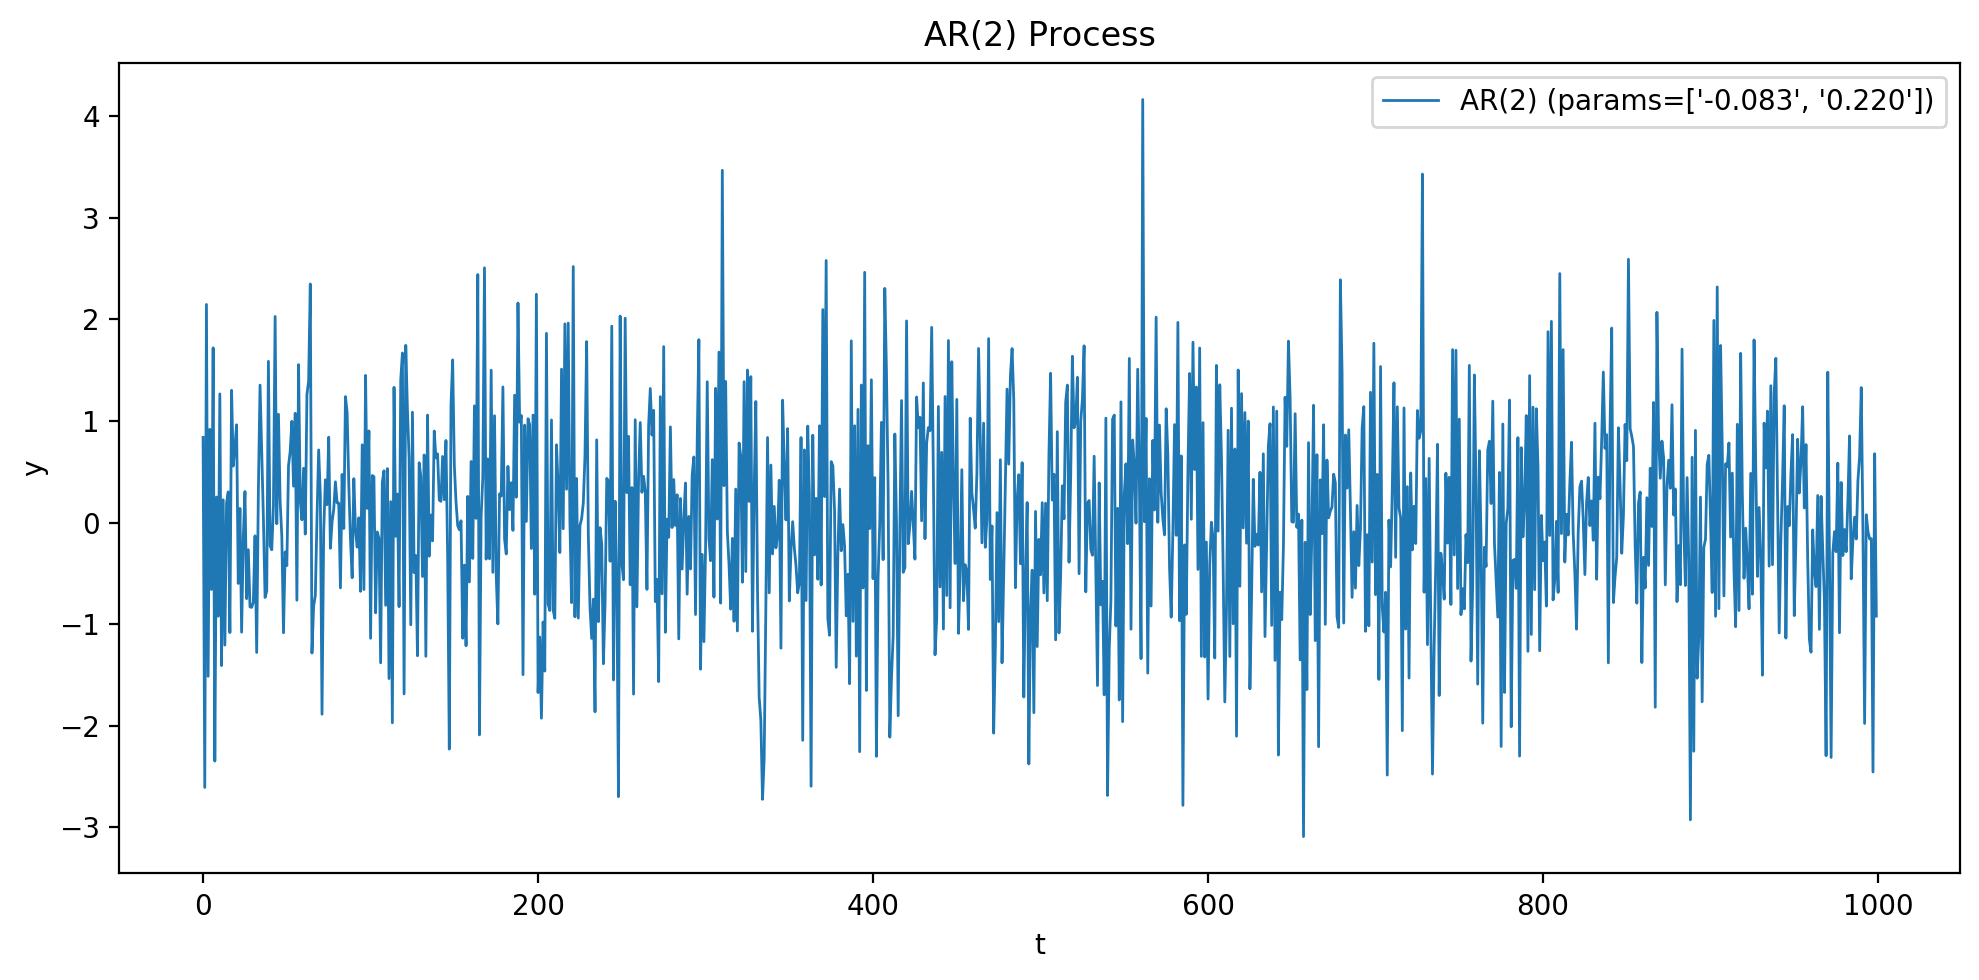

<IPython.core.display.Javascript object>

In [171]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

# Hyperparameters
num_steps = 1000
c = 0  # Constant (drift)
sigma = 1  # White noise stdev

p = 2  # Model order
ar_params = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
y = ar_process(num_steps, p, ar_params, c=c, scale=sigma)

t = np.arange(num_steps)
sns.lineplot(t, y, ax=ax, label=f'AR({p}) (params={[f"{a:.3f}" for a in alphas]})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'AR({p}) Process')
ax.legend()
fig.tight_layout();

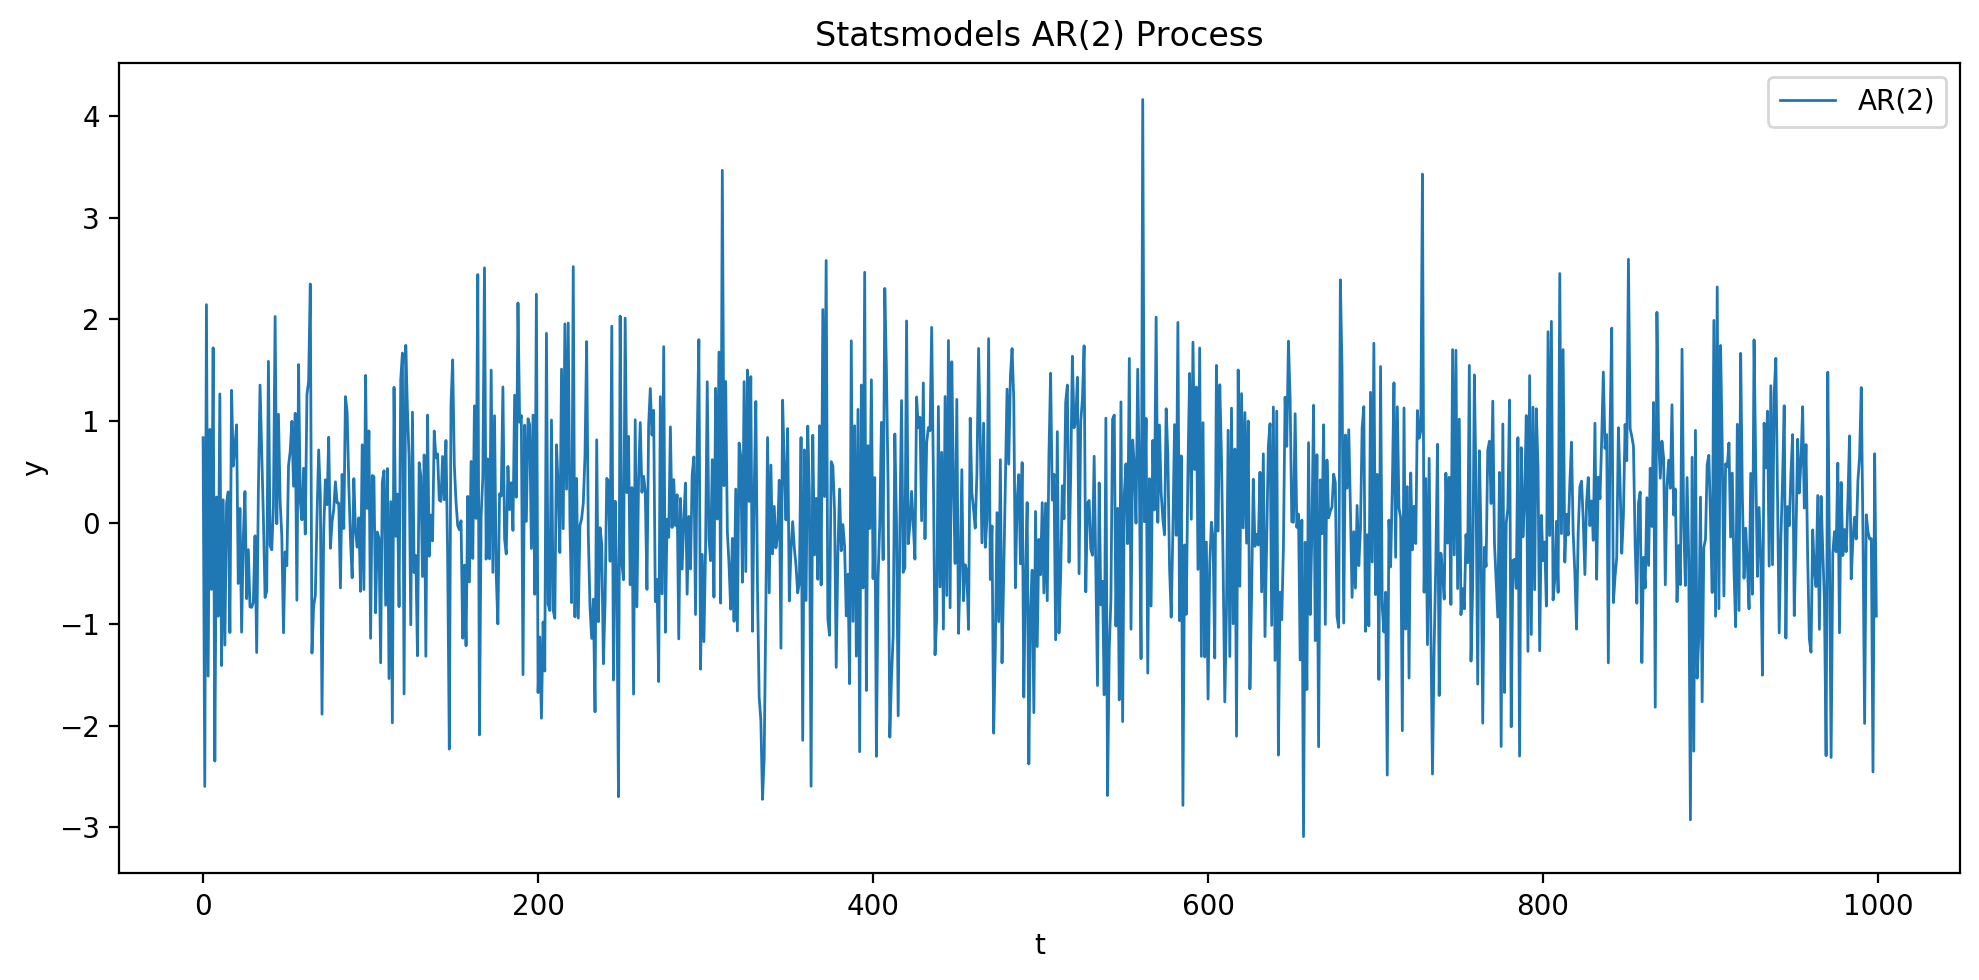

<IPython.core.display.Javascript object>

In [104]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

# Hyperparameters
num_steps = 1000
c = 0  # Constant (drift)
sigma = 1  # White noise stdev

p = 2  # Model order
ar_params = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
sm_ar = smt.arima_process.arma_generate_sample(ar=np.r_[1, -ar_params], ma=[1], nsample=num_steps, scale=sigma, burnin=p)

t = np.arange(num_steps)
sns.lineplot(t, sm_ar, ax=ax, label=f'AR({p})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'Statsmodels AR({p}) Process')
ax.legend()
fig.tight_layout()

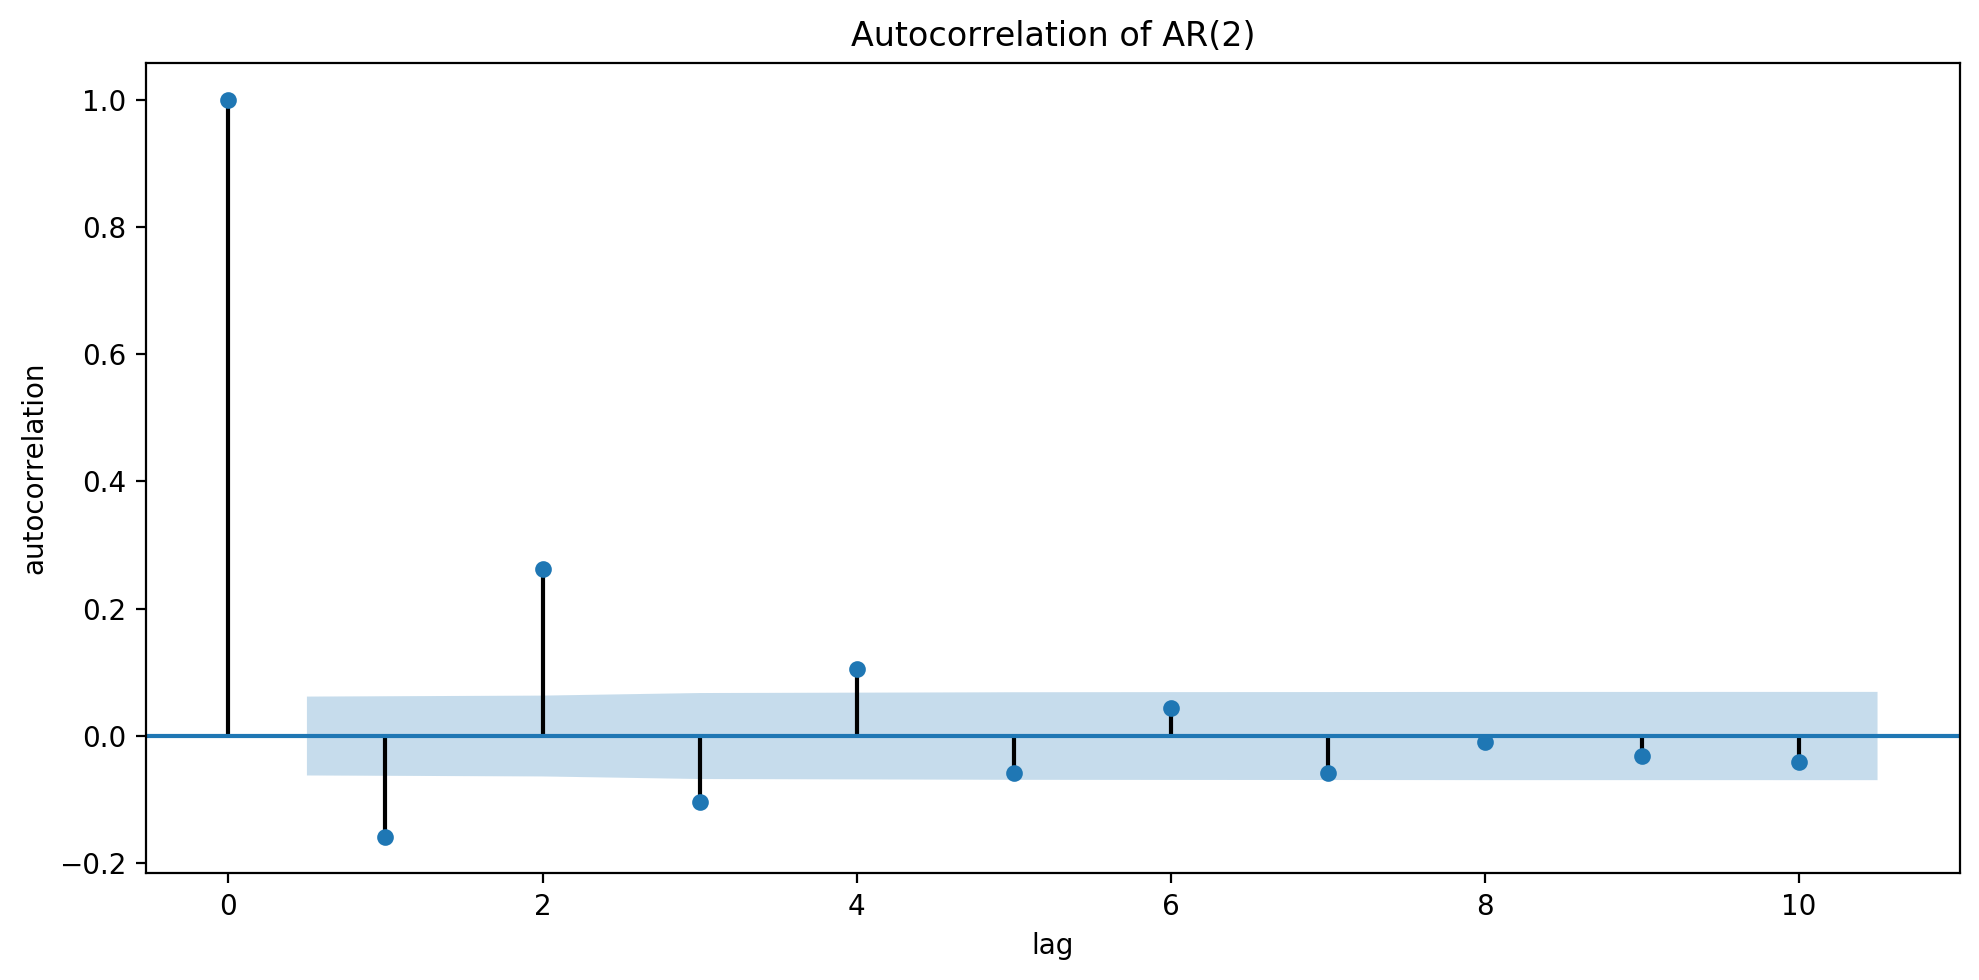

<IPython.core.display.Javascript object>

In [87]:
fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
sm.graphics.tsa.plot_acf(y, lags=10, ax=ax)
ax.set(xlabel='lag', ylabel='autocorrelation', title=f'Autocorrelation of AR({p})')
fig.tight_layout();

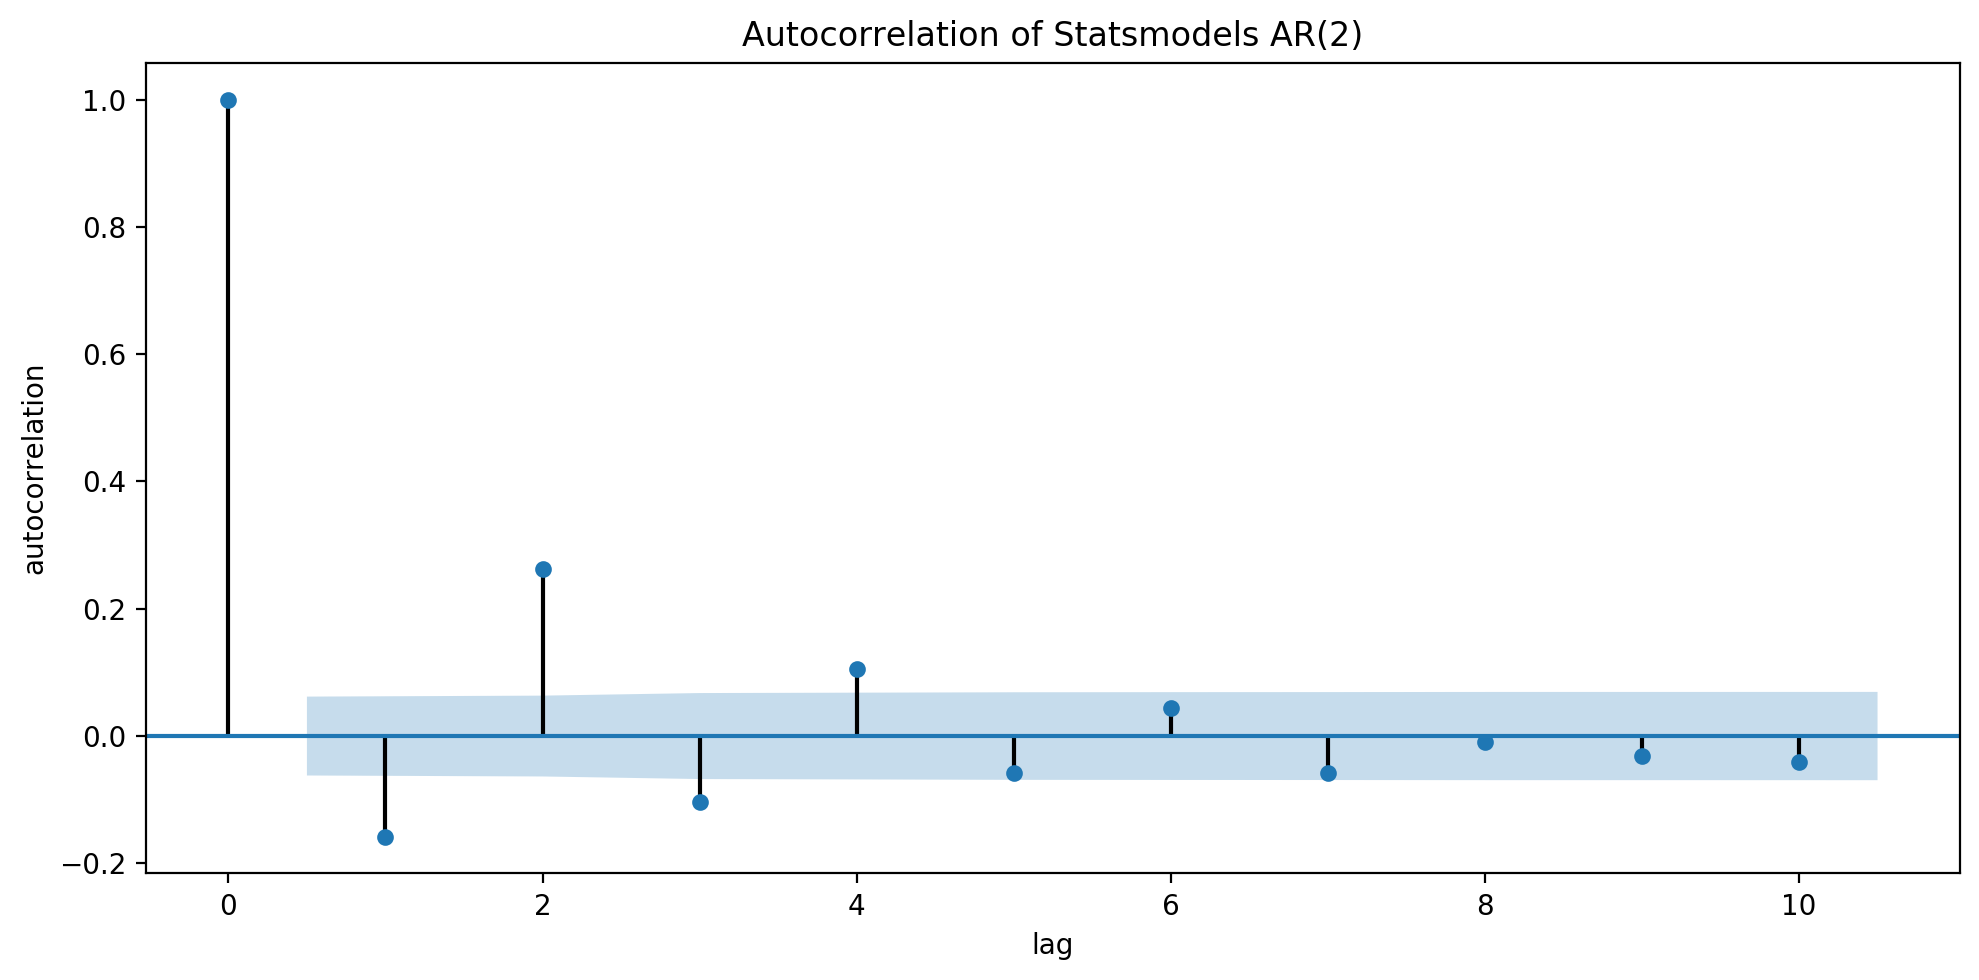

<IPython.core.display.Javascript object>

In [105]:
fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
sm.graphics.tsa.plot_acf(sm_ar, lags=10, ax=ax)
ax.set(xlabel='lag', ylabel='autocorrelation', title=f'Autocorrelation of Statsmodels AR({p})')
fig.tight_layout();

In [90]:
model = smt.ar_model.AutoReg(y, p)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(2)   Log Likelihood               -1394.674
Method:               Conditional MLE   S.D. of innovations              0.979
Date:                Sun, 24 May 2020   AIC                             -0.035
Time:                        13:48:51   BIC                             -0.015
Sample:                             2   HQIC                            -0.027
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0390      0.031      1.255      0.210      -0.022       0.100
y.L1          -0.1177      0.031     -3.845      0.000      -0.178      -0.058
y.L2           0.2445      0.031      7.992      0.000       0.185       0.305
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7959           +0.0000j            1.7959            0.5000
AR.2            2.2770           +0.0000j            2.2770            0.0000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>

In [91]:
model = smt.ar_model.AutoReg(sm_ar, p)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(2)   Log Likelihood               -1397.610
Method:               Conditional MLE   S.D. of innovations              0.982
Date:                Sun, 24 May 2020   AIC                             -0.029
Time:                        13:48:52   BIC                             -0.009
Sample:                             2   HQIC                            -0.022
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0374      0.031      1.200      0.230      -0.024       0.098
y.L1          -0.1189      0.031     -3.866      0.000      -0.179      -0.059
y.L2           0.2456      0.031      7.986      0.000       0.185       0.306
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7900           +0.0000j            1.7900            0.5000
AR.2            2.2742           +0.0000j            2.2742            0.0000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>

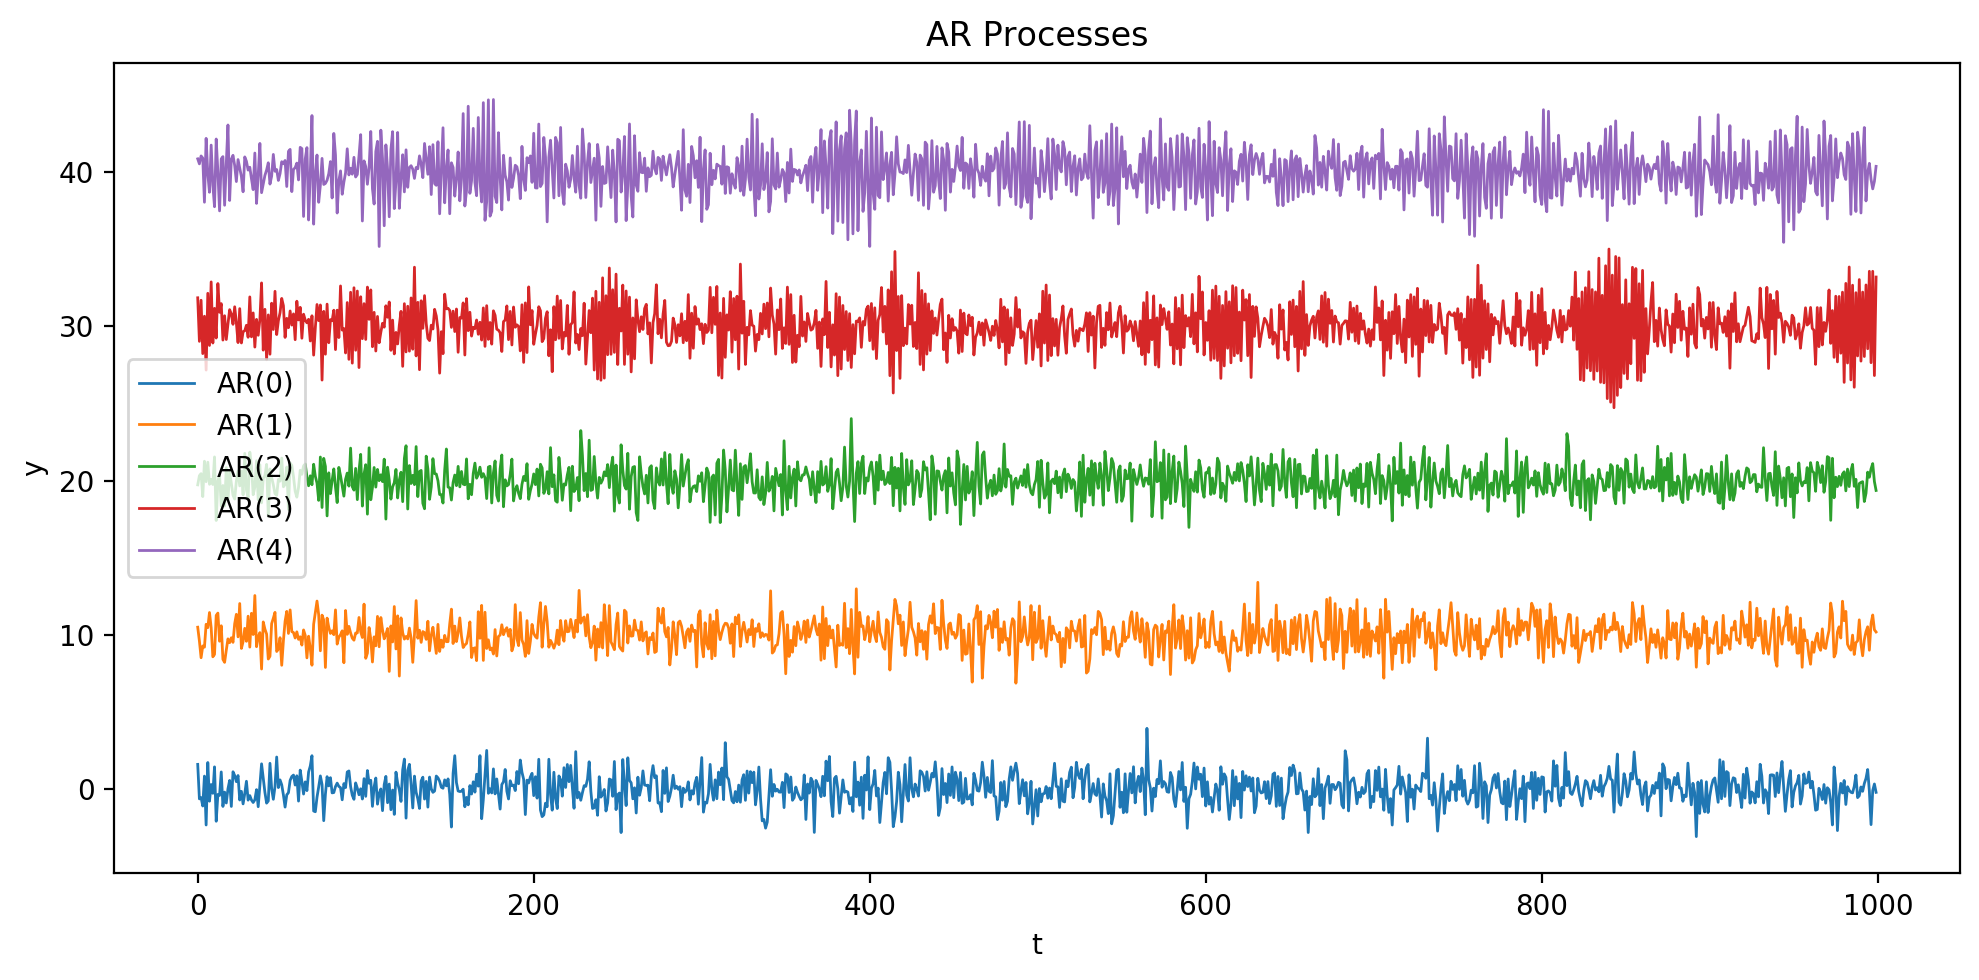

<IPython.core.display.Javascript object>

In [14]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

orders = np.arange(5)
t = np.arange(num_steps)

for p in orders:
    alphas = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
    y = ar_process(num_steps, p, alphas, c=c, sigma=sigma) + (p * 10)  # Add vertical separation
    sns.lineplot(t, y, ax=ax, label=f'AR({p})', linewidth=1)

ax.set(xlabel='t', ylabel='y', title='AR Processes')
ax.legend()
fig.tight_layout();

## Moving-Average (MA) Models
An MA model of order $q$, denoted MA($q$), is a model where the current time point is dependent on the previous $q$ noise terms. Formally, the model is expressed as
$$
X_t = \mu + \epsilon_t + \sum_{i=1}^q \beta_i \epsilon_{t-i}
$$
where $\mu = \mathrm{E}[X_t]$ (often assumed 0), $\beta_i$ are additional model parameters, and $\epsilon_{t-i}$ are again white noise. Note, it is assumed $\epsilon_t \overset{iid}{\sim} \mathcal{N}(0, \sigma^2)$ for all $t$.

In [9]:
def ma_process(num_steps, q, weights, c=0, scale=1, mu=0):
    """
    Generates MA(q) sample. Fixed the burnin to equal the model order to
    remove dependencies on first q terms of the sample.
    """
    if num_steps < q:
        raise ValueError('Model order cannot exceed number of steps.')
    t = np.arange(num_steps)
    x = np.zeros(num_steps)
    
    noise = np.random.normal(scale=sigma, size=(num_steps + q))  # Extra q terms used to compute the first q X_t values
    ma = np.convolve(weights, noise[:-1], 'valid') if q > 0 else 0
    x = mu + noise[q:] + ma
    
    return x

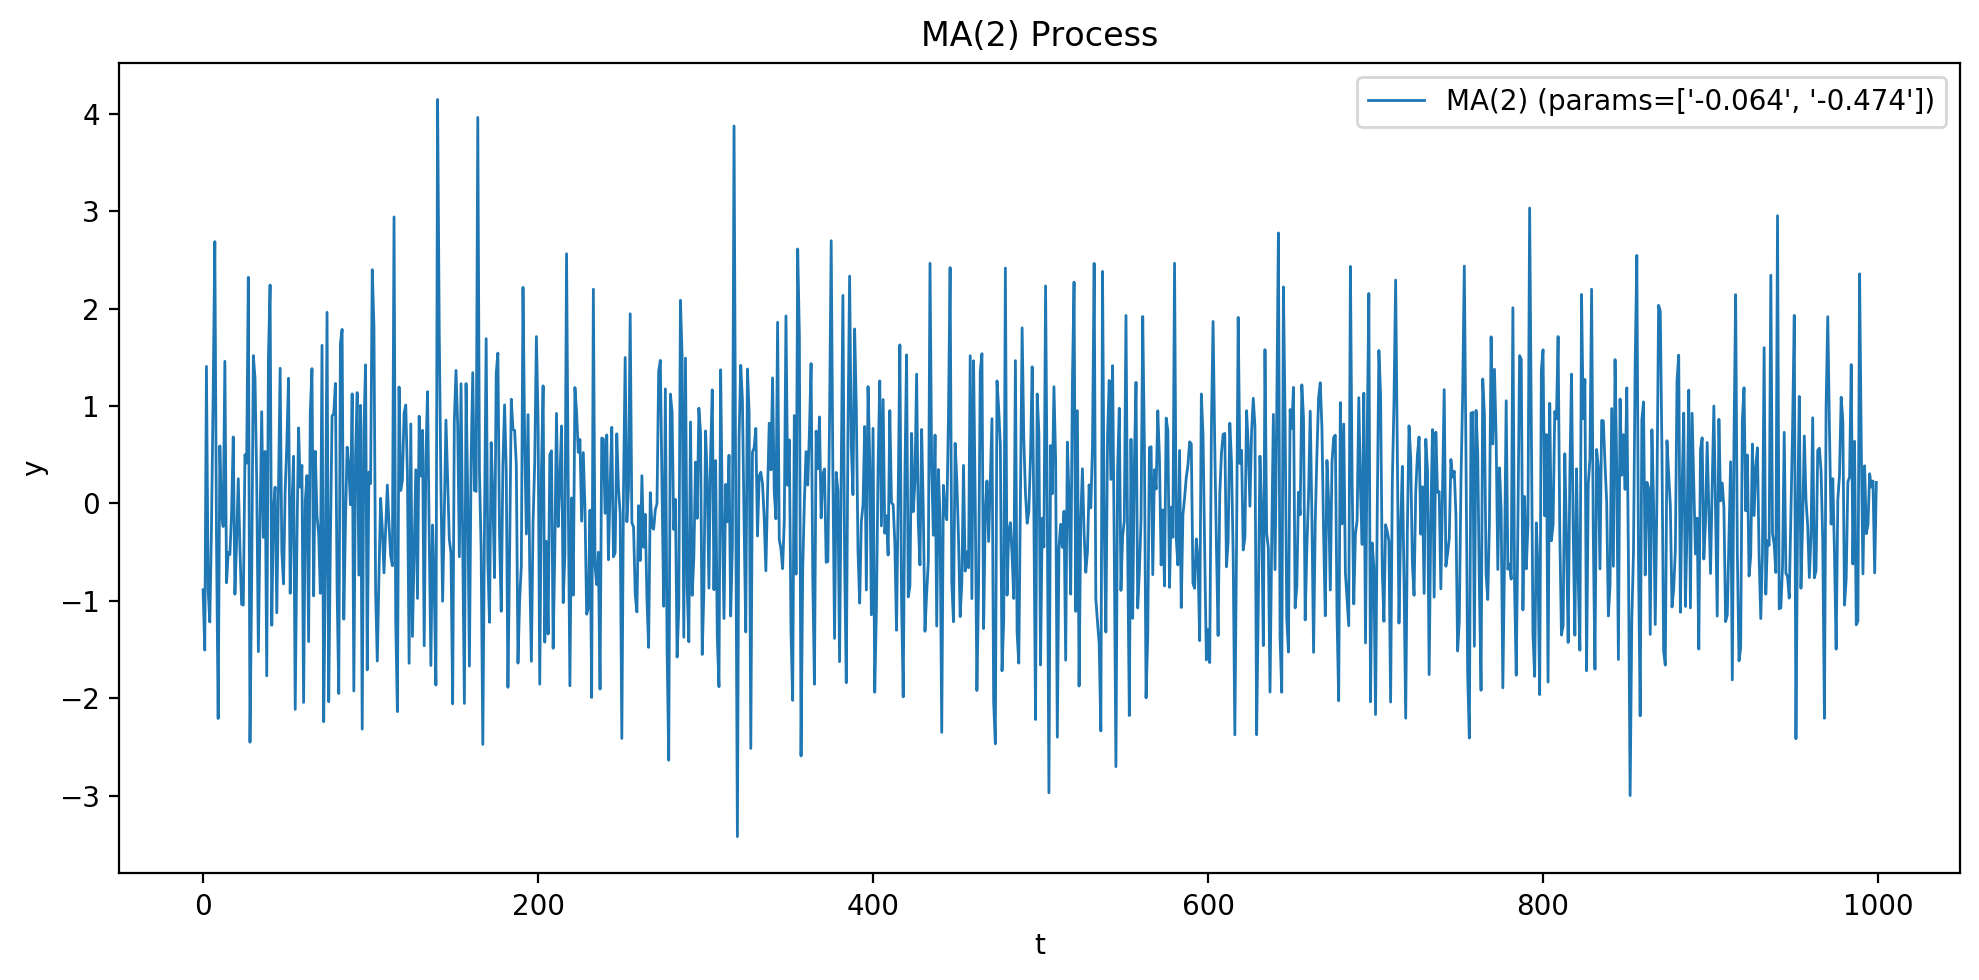

In [23]:
np.random.seed(2)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

# Hyperparameters
num_steps = 1000
c = 0  # Constant (drift)
sigma = 1  # White noise stdev
mu = 0  # Expectation of each time point

q = 2  # Model order
ma_params = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random model parameters
y = ma_process(num_steps, q, ma_params, c=c, scale=sigma, mu=mu)

t = np.arange(num_steps)
sns.lineplot(t, y, ax=ax, label=f'MA({q}) (params={[f"{b:.3f}" for b in ma_params]})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'MA({q}) Process')

fig.tight_layout();

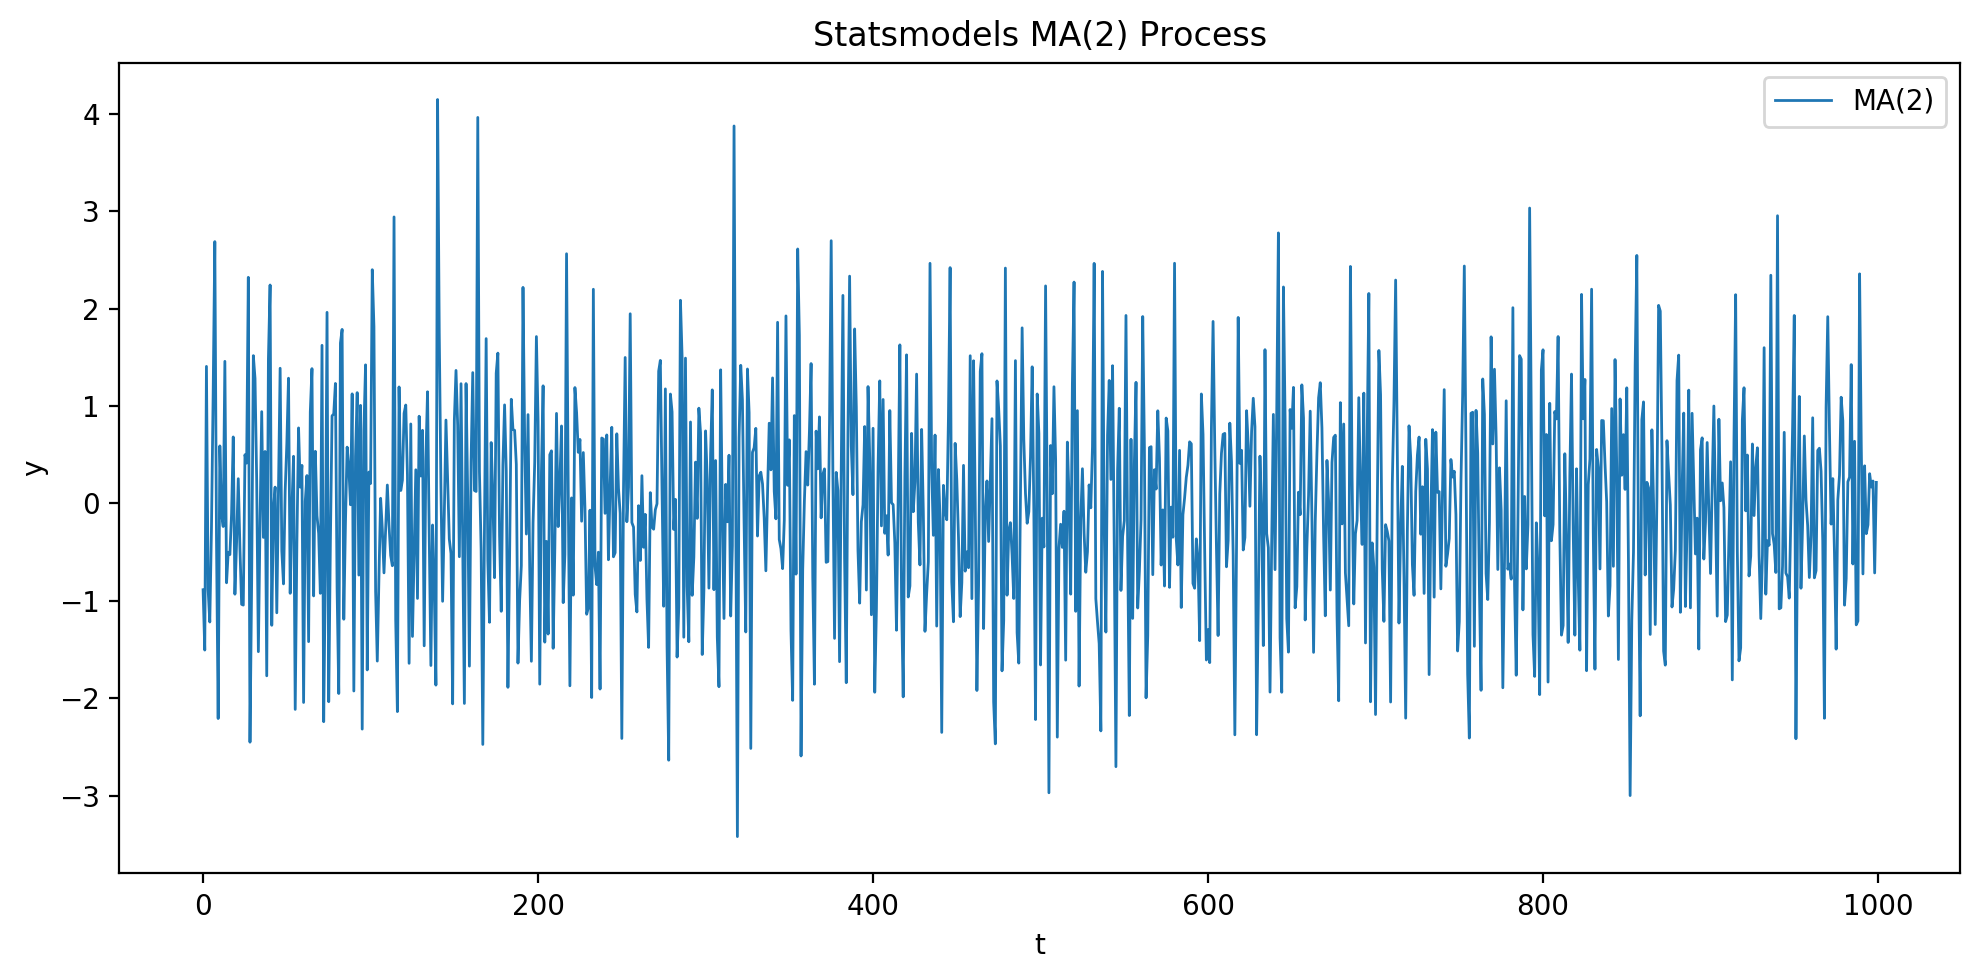

In [24]:
np.random.seed(2)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

ma_params = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
sm_ma = smt.arima_process.arma_generate_sample(ar=[1], ma=np.r_[1, ma_params], nsample=num_steps, scale=sigma, burnin=q)

t = np.arange(num_steps)
sns.lineplot(t, sm_ma, ax=ax, label=f'MA({q})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'Statsmodels MA({q}) Process')
ax.legend()
fig.tight_layout()

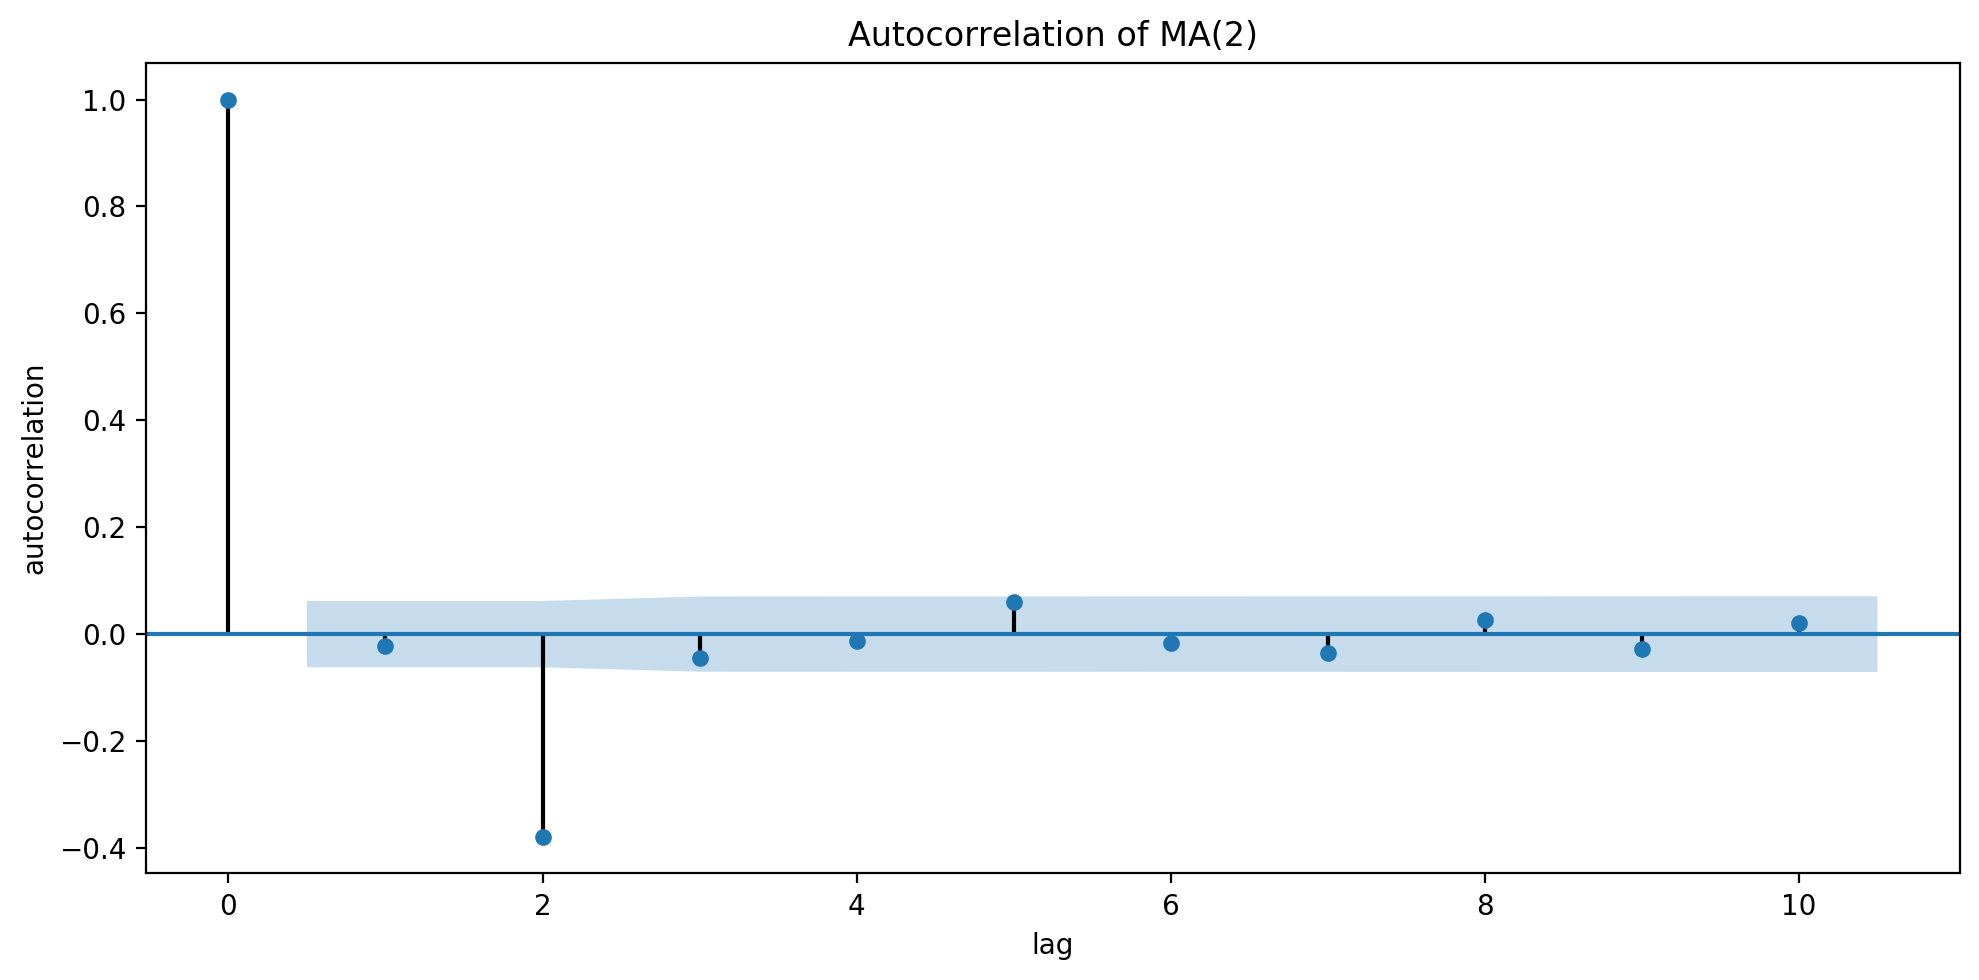

In [25]:
fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
sm.graphics.tsa.plot_acf(y, lags=10, ax=ax)
ax.set(xlabel='lag', ylabel='autocorrelation', title=f'Autocorrelation of MA({q})')
fig.tight_layout();

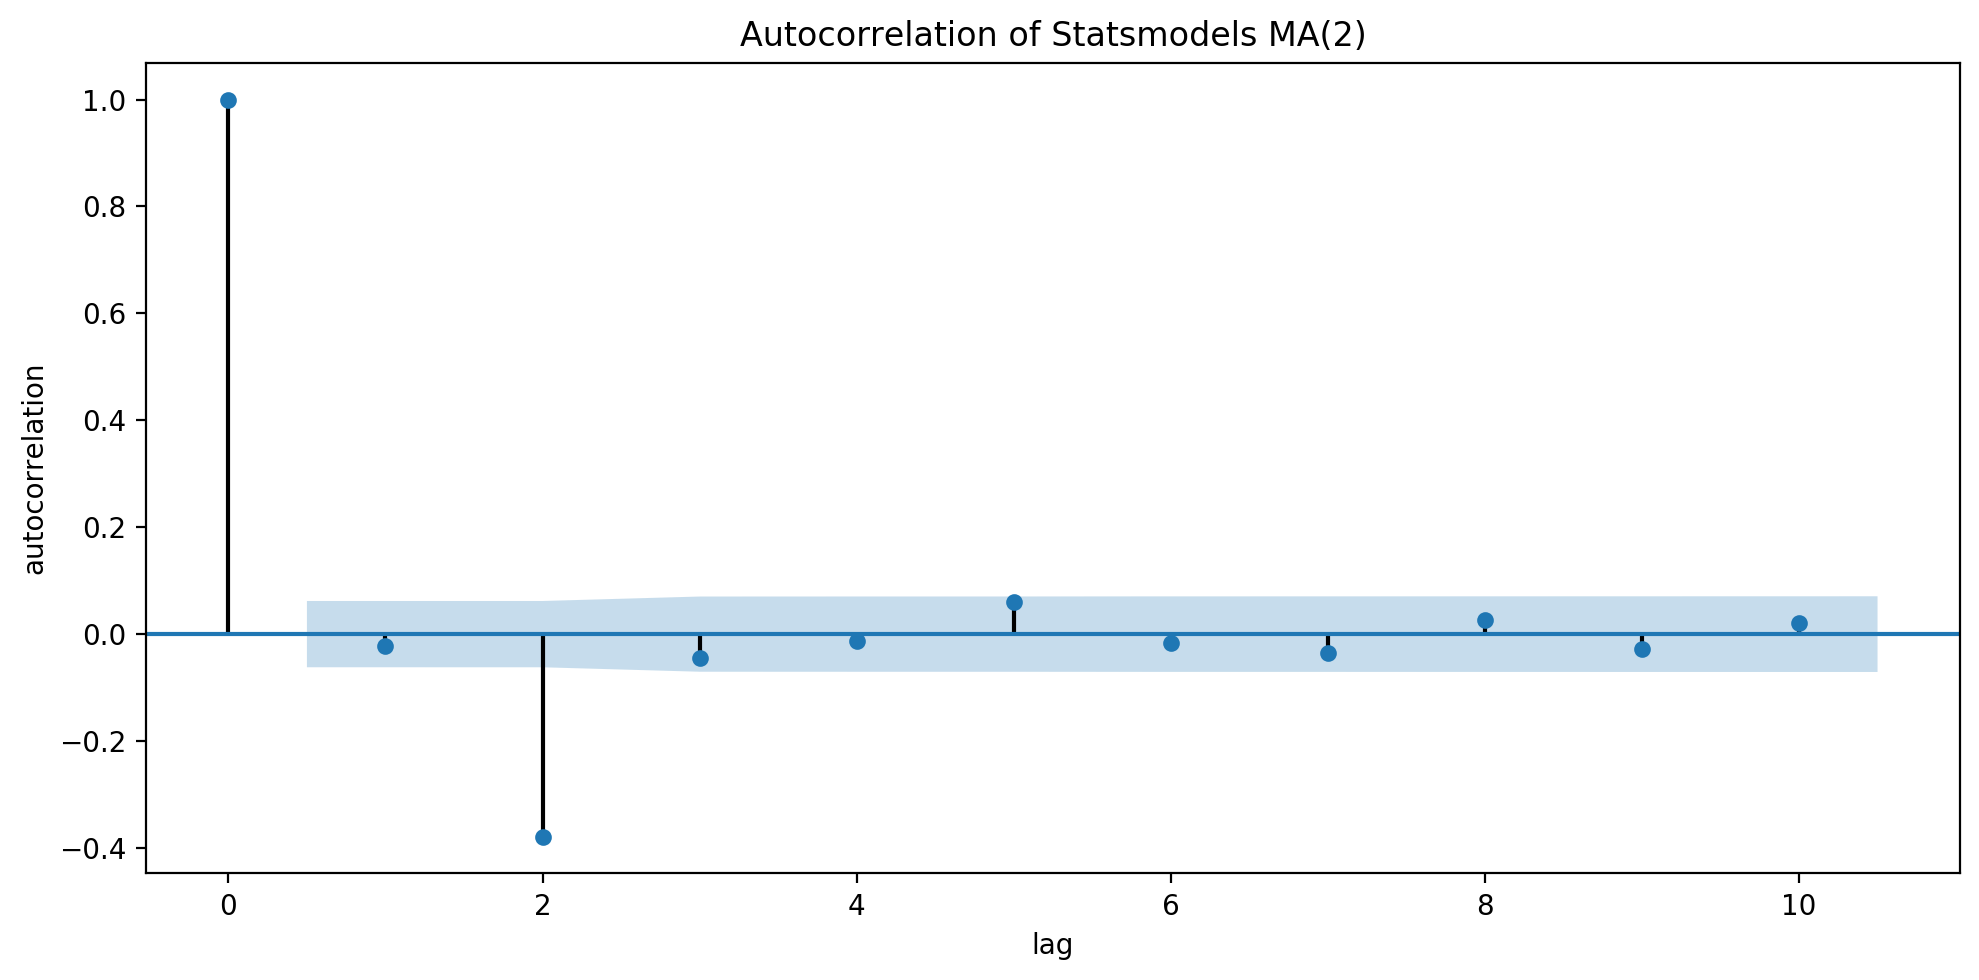

In [26]:
fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
sm.graphics.tsa.plot_acf(sm_ma, lags=10, ax=ax)
ax.set(xlabel='lag', ylabel='autocorrelation', title=f'Autocorrelation of Statsmodels MA({q})')
fig.tight_layout();

In [21]:
model = smt.arima_model.ARMA(y, (0, q))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 2)   Log Likelihood               -1401.019
Method:                       css-mle   S.D. of innovations              0.982
Date:                Sun, 24 May 2020   AIC                           2810.039
Time:                        16:49:47   BIC                           2829.670
Sample:                             0   HQIC                          2817.500
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0413      0.035      1.183      0.237      -0.027       0.110
ma.L1.y       -0.1024      0.031     -3.306      0.001      -0.163      -0.042
ma.L2.y        0.2278      0.030      7.623      0.000       0.169       0.286
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.2248           -2.0831j            2.0952           -0.2329
MA.2            0.2248           +2.0831j            2.0952            0.2329
-----------------------------------------------------------------------------
"""

In [22]:
model = smt.arima_model.ARMA(sm_ma, (0, q))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 2)   Log Likelihood               -1419.352
Method:                       css-mle   S.D. of innovations              1.000
Date:                Sun, 24 May 2020   AIC                           2846.704
Time:                        16:49:47   BIC                           2866.335
Sample:                             0   HQIC                          2854.165
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.013     -1.520      0.129      -0.047       0.006
ma.L1.y       -0.0956      0.027     -3.498      0.000      -0.149      -0.042
ma.L2.y       -0.4815      0.027    -17.829      0.000      -0.534      -0.429
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3453           +0.0000j            1.3453            0.0000
MA.2           -1.5439           +0.0000j            1.5439            0.5000
-----------------------------------------------------------------------------
"""

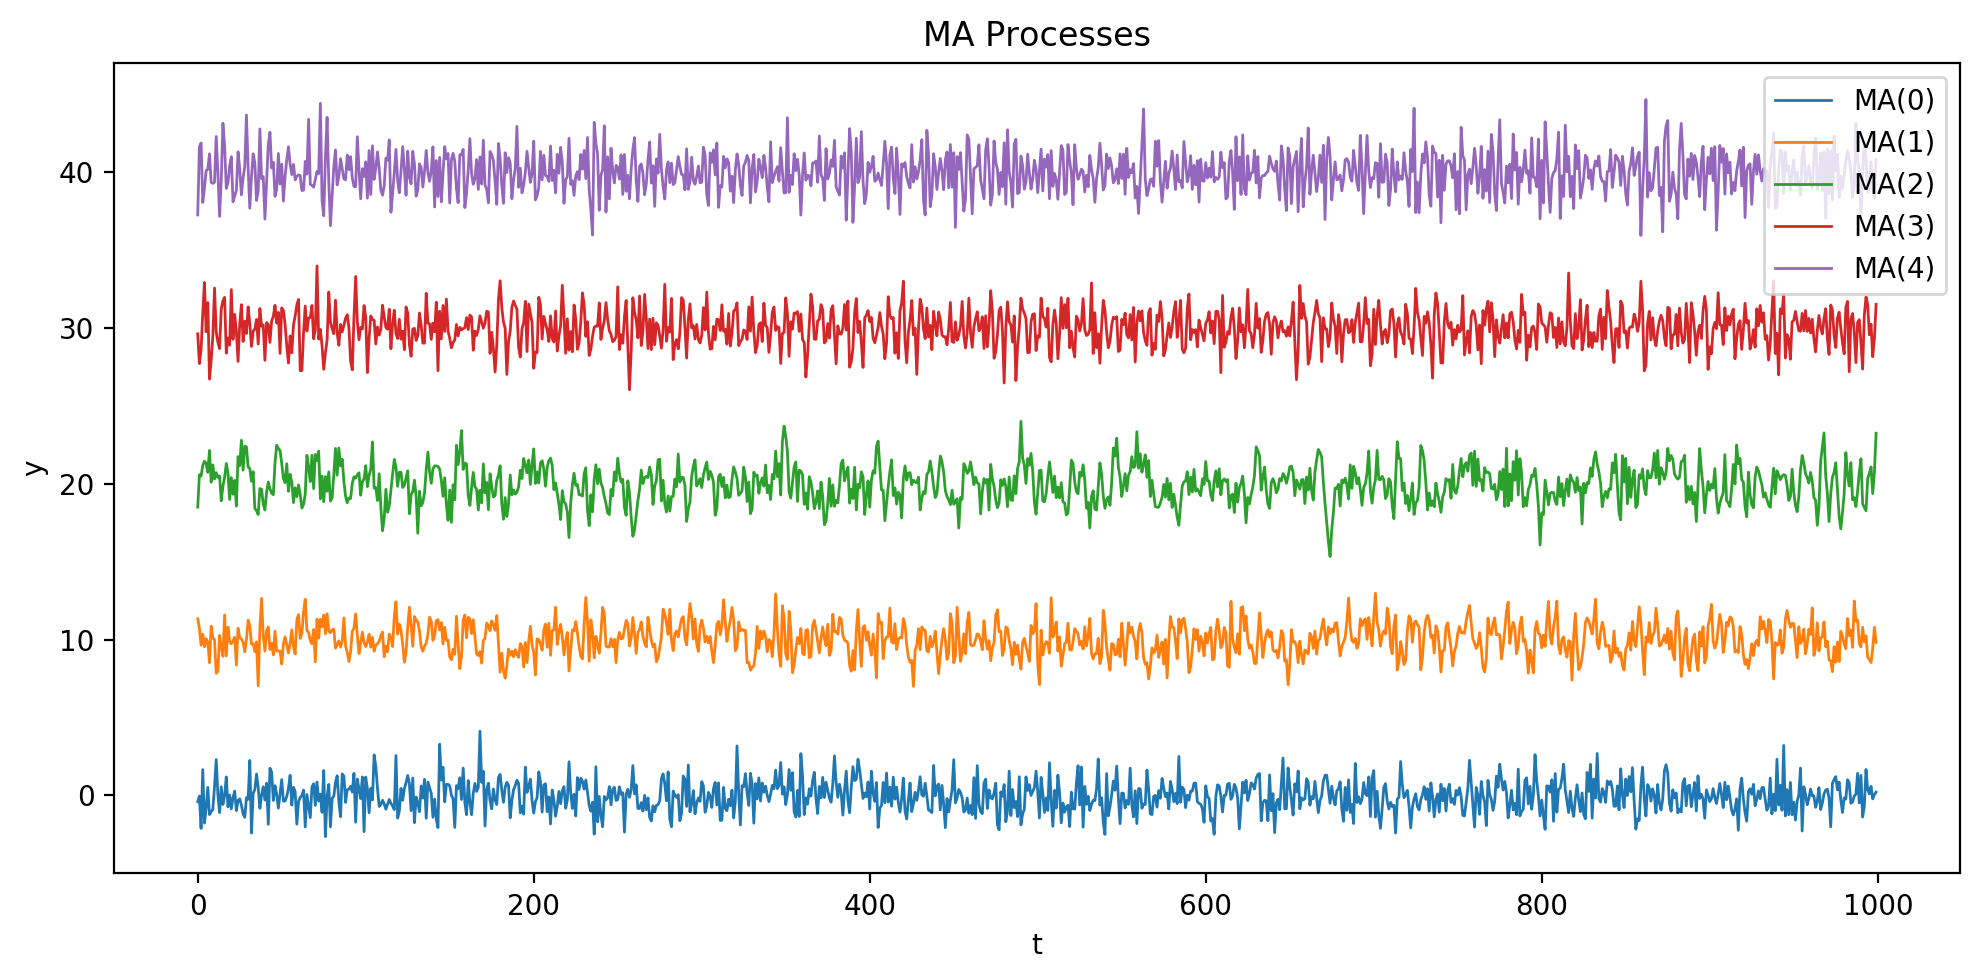

<IPython.core.display.Javascript object>

In [109]:
np.random.seed(2)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

orders = np.arange(5)
t = np.arange(num_steps)

for q in orders:
    betas = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random model parameters
    y = ma_process(num_steps, q, betas, c=c, sigma=sigma, mu=mu) + (q * 10)
    sns.lineplot(t, y, ax=ax, label=f'MA({q})', linewidth=1)

ax.set(xlabel='t', ylabel='y', title='MA Processes')
ax.legend()
fig.tight_layout();

## Autoregressive Moving-Average (ARMA) Models
An ARMA model of order ($p$, $q$), denoted ARMA($p$, $q$), is a model where the current time point is dependent on the previous $p$ time points and previous $q$ noise terms. Formally, the model is expressed as
$$
X_t = c + \epsilon_t + \sum_{i=1}^p \alpha_i X_{t-i} + \sum_{i=1}^q \beta_i \epsilon_{t-i}
$$
or equivalently
$$
\left(1 - \sum_{i=1}^p \alpha_i L^i \right)X_t = \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$

In [42]:
def arma_process(num_steps, p, q, ar_params, ma_params, c=0, sigma=1, mu=0):
    if num_steps < max(p, q):
        raise ValueError('Model order cannot exceed number of steps.')
    t = np.arange(num_steps)
    x = np.zeros(num_steps + p)  # The first p terms will not exactly follow the AR model
    
    x[:p] = np.random.normal(size=p)  # Initialize first p points from standard Gaussian
    
    noise = np.random.normal(scale=sigma, size=(num_steps + q))
    x[p:] = c + noise[q:]  # Add shifts and white noise beforehand
    
    ma = np.convolve(ma_params, noise[:-1], 'valid') if q > 0 else 0
    x[p:] += ma  # Add moving-average terms beforehand
    
    for i in t:
        x[i+p] += (ar_params @ x[i:i+p][::-1])
    
    return x[p:]

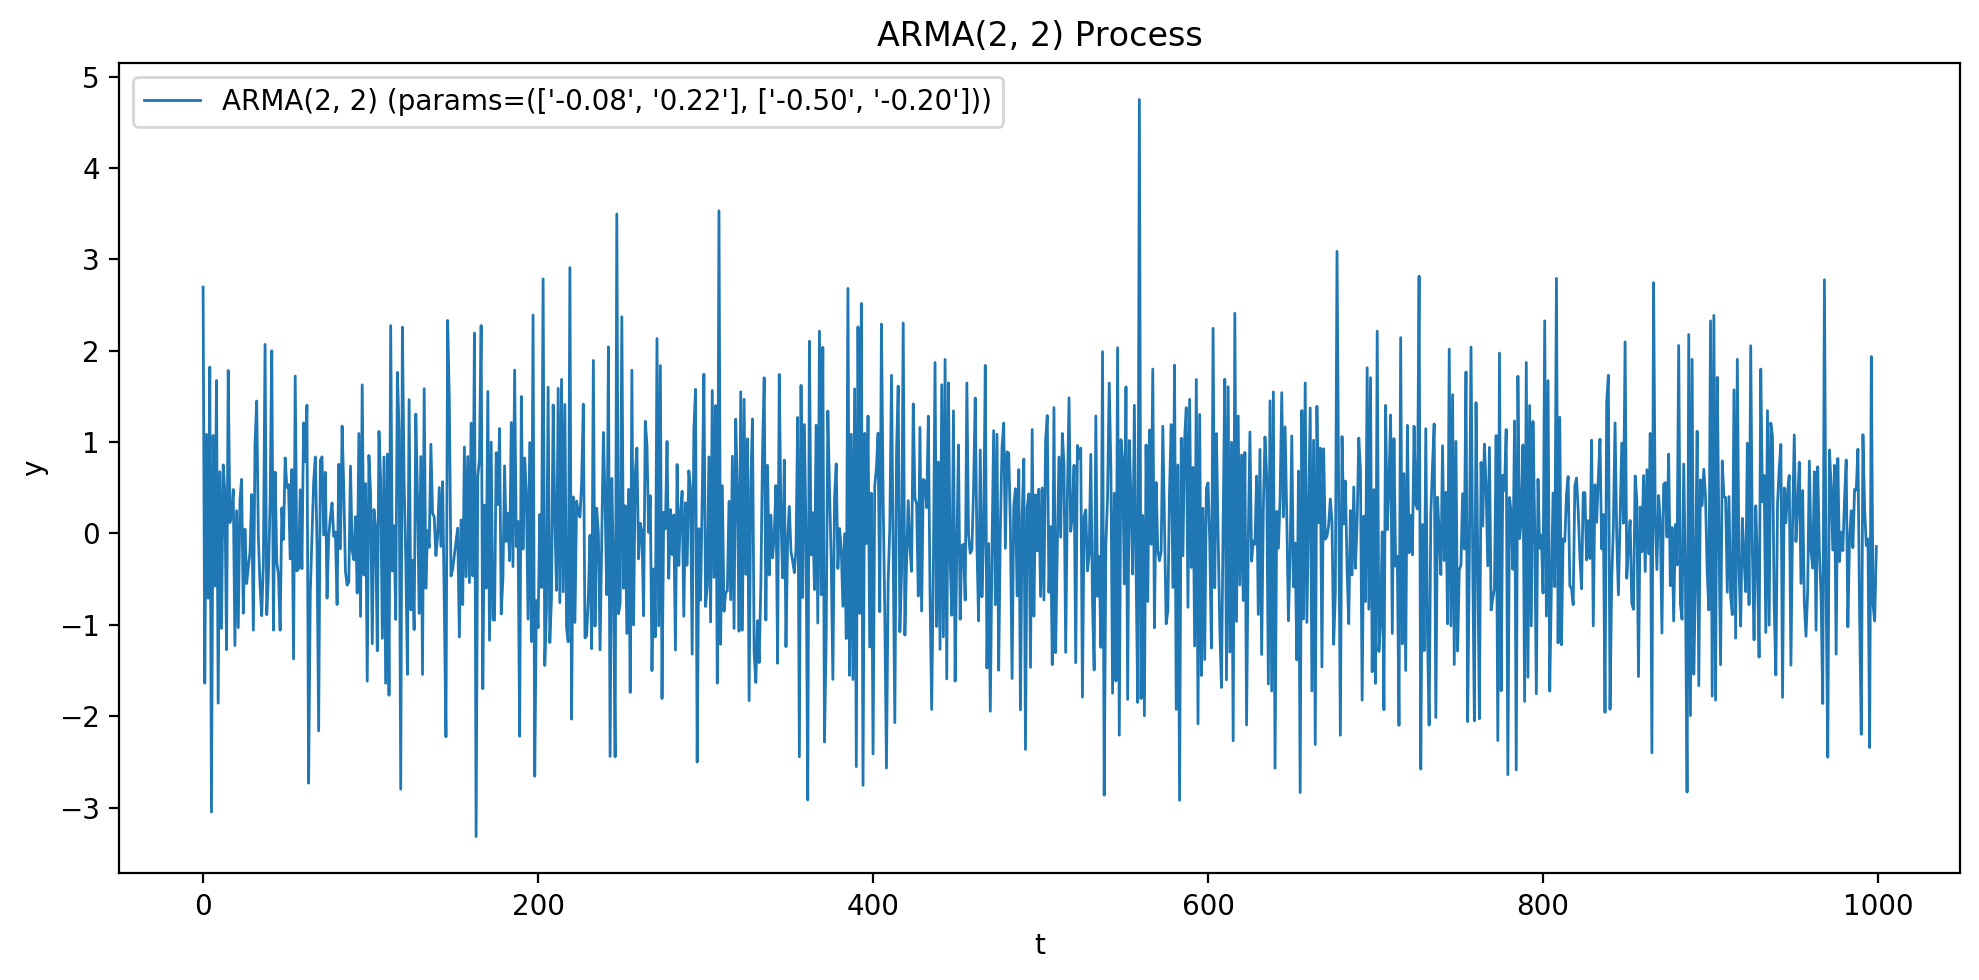

In [43]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

# Hyperparameters
num_steps = 1000
c = 0  # Constant (drift)
sigma = 1  # White noise stdev
mu = 0  # Expectation of each time point

p = 2  # AR order
q = 2  # MA order
ar_params = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random AR model parameters
ma_params = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random MA model parameters
y = arma_process(num_steps, p, q, ar_params, ma_params, c=c, sigma=sigma, mu=mu)

t = np.arange(num_steps)
sns.lineplot(t, y, ax=ax, label=f'ARMA{p, q} (params={[f"{a:.2f}" for a in ar_params], [f"{b:.2f}" for b in ma_params]})', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'ARMA{p, q} Process')

fig.tight_layout();

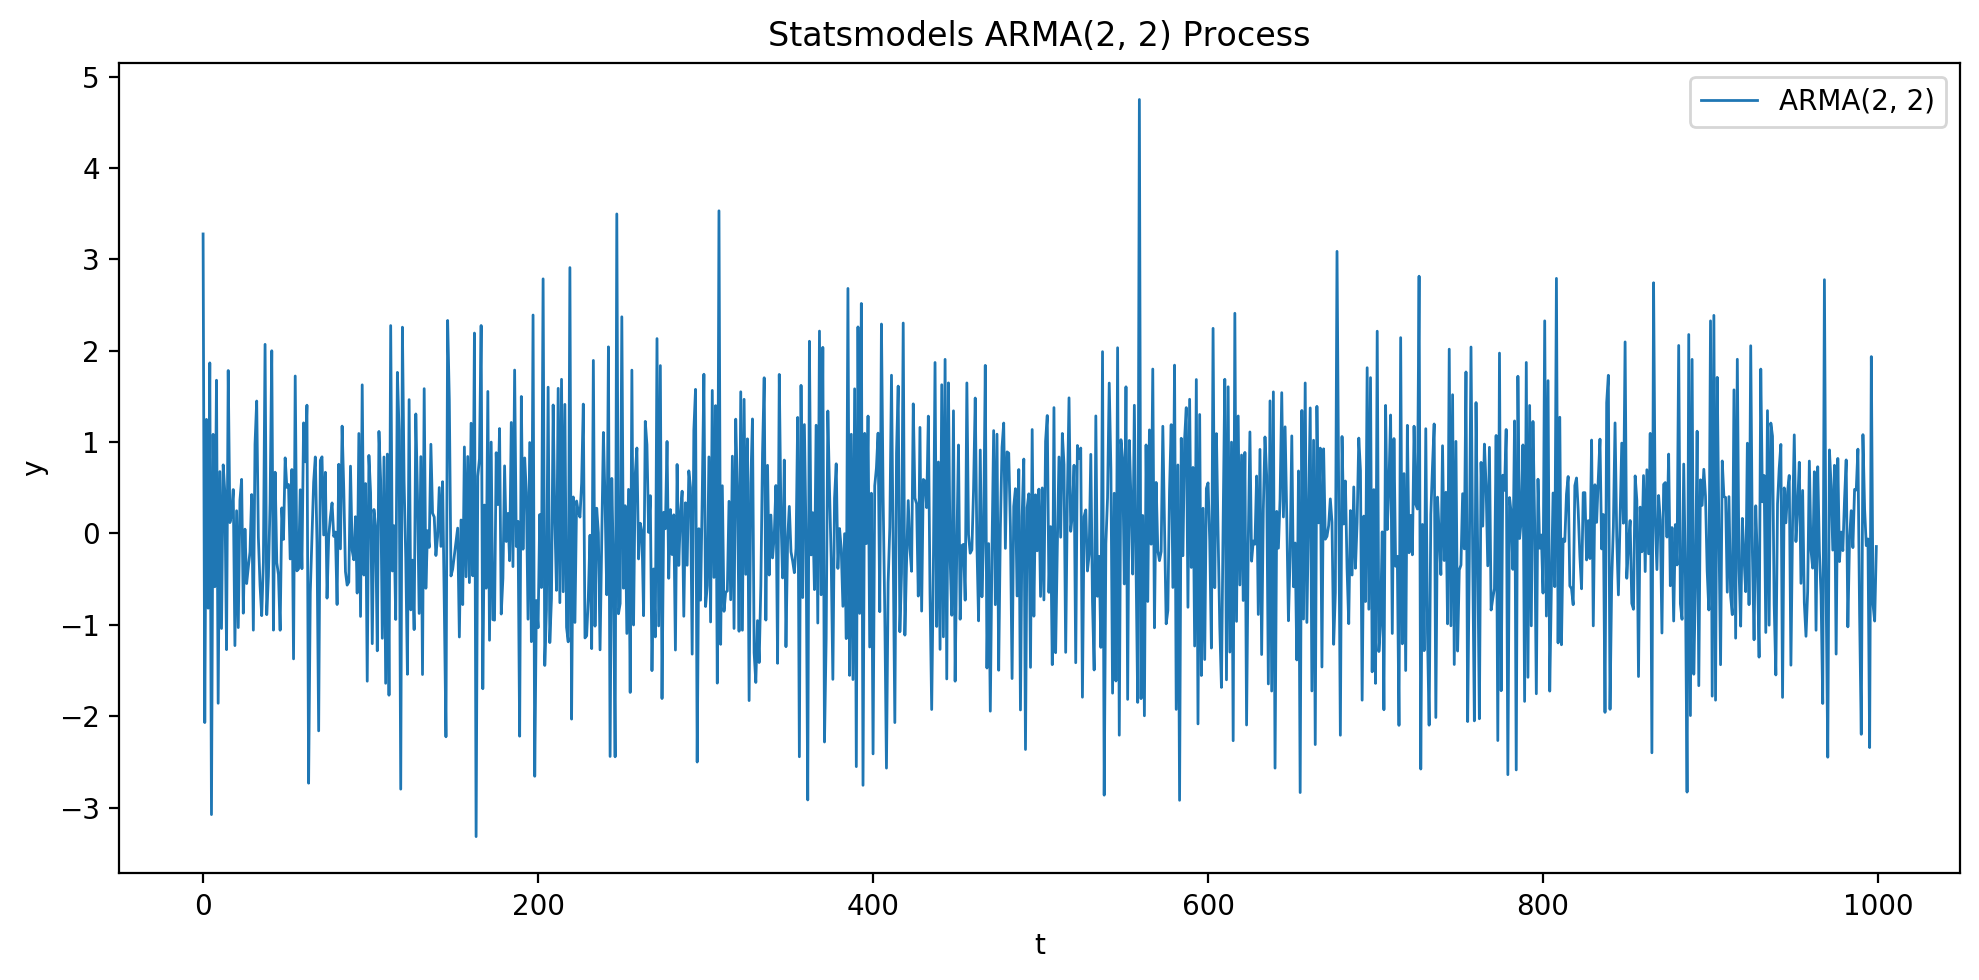

In [44]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

ar_params = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random AR model parameters
ma_params = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random MA model parameters
sm_arma = smt.arima_process.arma_generate_sample(ar=np.r_[1, -ar_params], ma=np.r_[1, ma_params], nsample=num_steps, scale=sigma, burnin=(p+q))

t = np.arange(num_steps)
sns.lineplot(t, sm_arma, ax=ax, label=f'ARMA{p, q}', linewidth=1)
ax.set(xlabel='t', ylabel='y', title=f'Statsmodels ARMA{p, q} Process')
ax.legend()
fig.tight_layout()

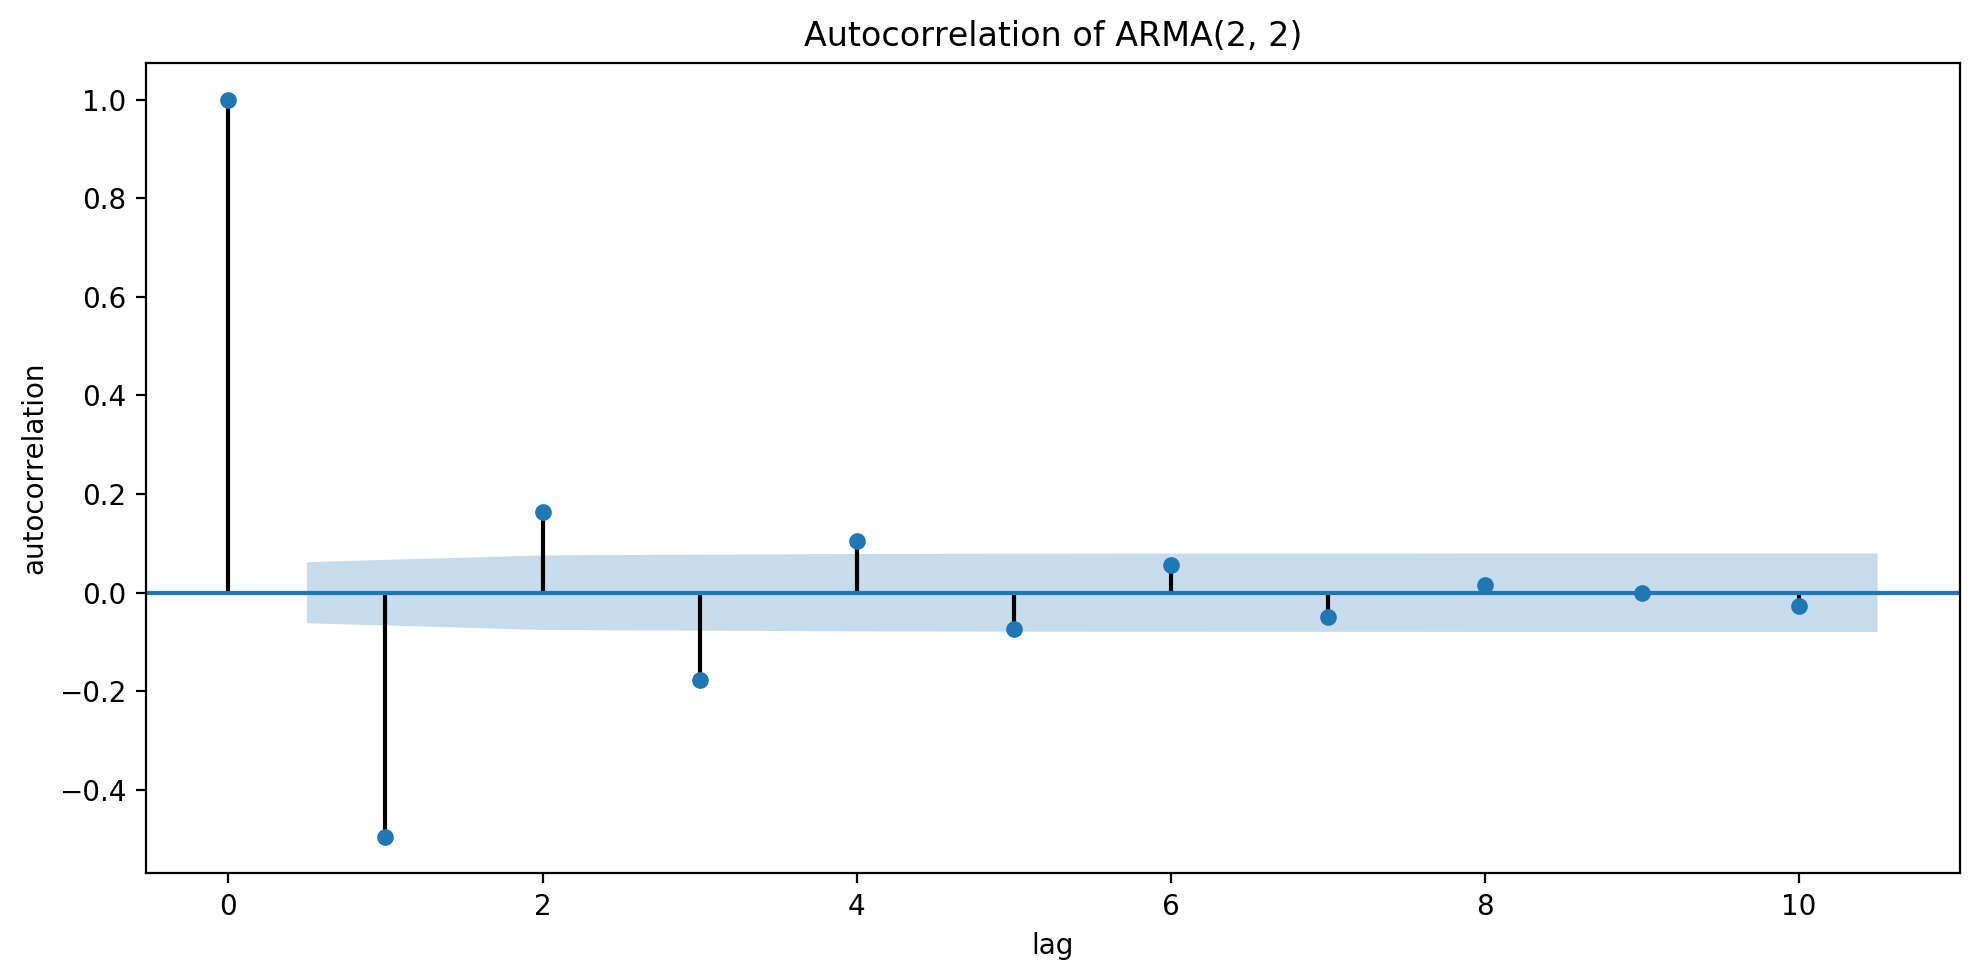

In [45]:
fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
sm.graphics.tsa.plot_acf(y, lags=10, ax=ax)
ax.set(xlabel='lag', ylabel='autocorrelation', title=f'Autocorrelation of ARMA{p, q}')
fig.tight_layout();

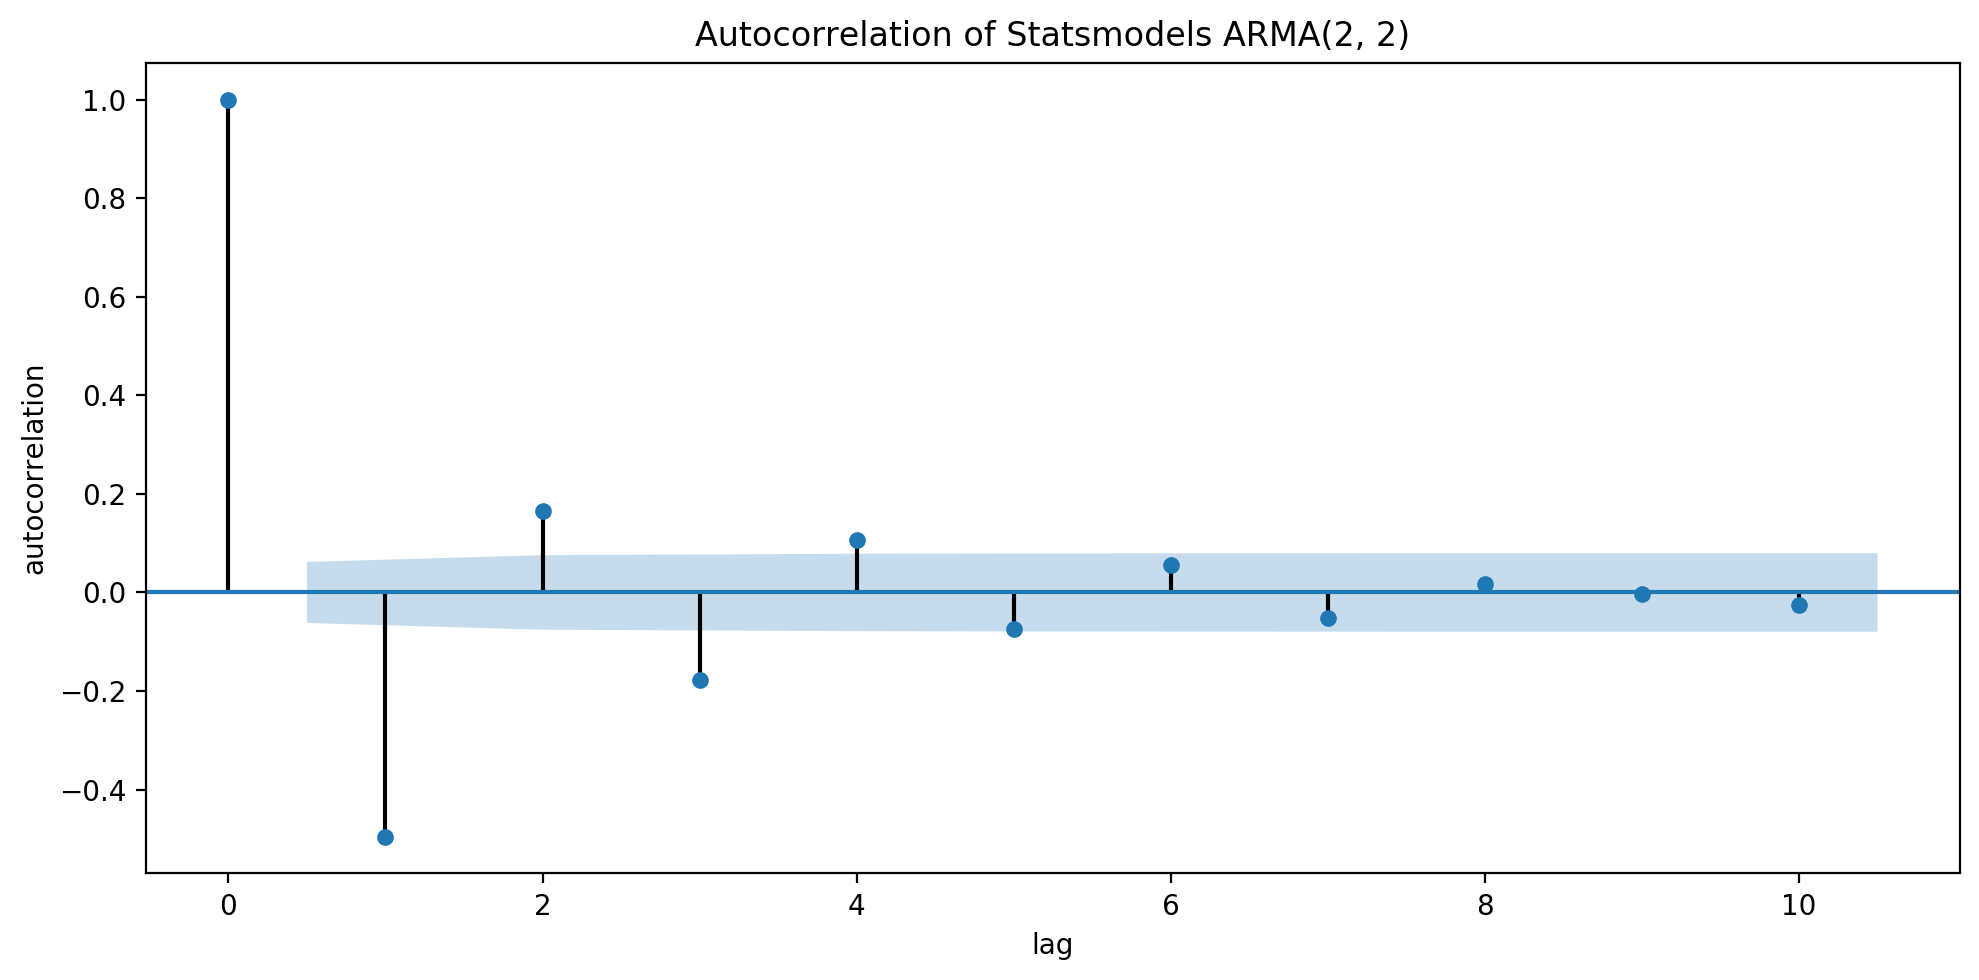

In [46]:
fig, ax = plt.subplots(dpi=200, figsize=(10, 5))
sm.graphics.tsa.plot_acf(sm_arma, lags=10, ax=ax)
ax.set(xlabel='lag', ylabel='autocorrelation', title=f'Autocorrelation of Statsmodels ARMA{p, q}')
fig.tight_layout();

In [146]:
print("AR parameters", *ar_params)
print("MA parameters", *ma_params)

AR parameters -0.082977995297426 0.2203244934421581
MA parameters -0.4998856251826551 -0.19766742736816023


<IPython.core.display.Javascript object>

In [144]:
model = smt.arima_model.ARMA(y, (p, q))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1398.524
Method:                       css-mle   S.D. of innovations              0.980
Date:                Sun, 24 May 2020   AIC                           2809.048
Time:                        14:45:27   BIC                           2838.495
Sample:                             0   HQIC                          2820.240
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.010      1.338      0.181      -0.006       0.032
ar.L1.y       -0.2174      0.190     -1.142      0.253      -0.591       0.156
ar.L2.y        0.2978      0.060      4.982      0.000       0.181       0.415
ma.L1.y       -0.3823      0.192     -1.991      0.046      -0.759      -0.006
ma.L2.y       -0.3298      0.109     -3.012      0.003      -0.544      -0.115
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5034           +0.0000j            1.5034            0.5000
AR.2            2.2335           +0.0000j            2.2335            0.0000
MA.1            1.2556           +0.0000j            1.2556            0.0000
MA.2           -2.4148           +0.0000j            2.4148            0.5000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>

In [145]:
model = smt.arima_model.ARMA(sm_ma, (p, q))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1422.390
Method:                       css-mle   S.D. of innovations              1.003
Date:                Sun, 24 May 2020   AIC                           2856.780
Time:                        14:45:27   BIC                           2886.227
Sample:                             0   HQIC                          2867.972
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0243      0.015     -1.585      0.113      -0.054       0.006
ar.L1.y       -0.0331      0.137     -0.242      0.809      -0.301       0.235
ar.L2.y        0.2124      0.103      2.067      0.039       0.011       0.414
ma.L1.y       -0.1401      0.128     -1.091      0.275      -0.392       0.112
ma.L2.y       -0.4638      0.111     -4.185      0.000      -0.681      -0.247
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0933           +0.0000j            2.0933            0.5000
AR.2            2.2491           +0.0000j            2.2491            0.0000
MA.1            1.3251           +0.0000j            1.3251            0.0000
MA.2           -1.6272           +0.0000j            1.6272            0.5000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>

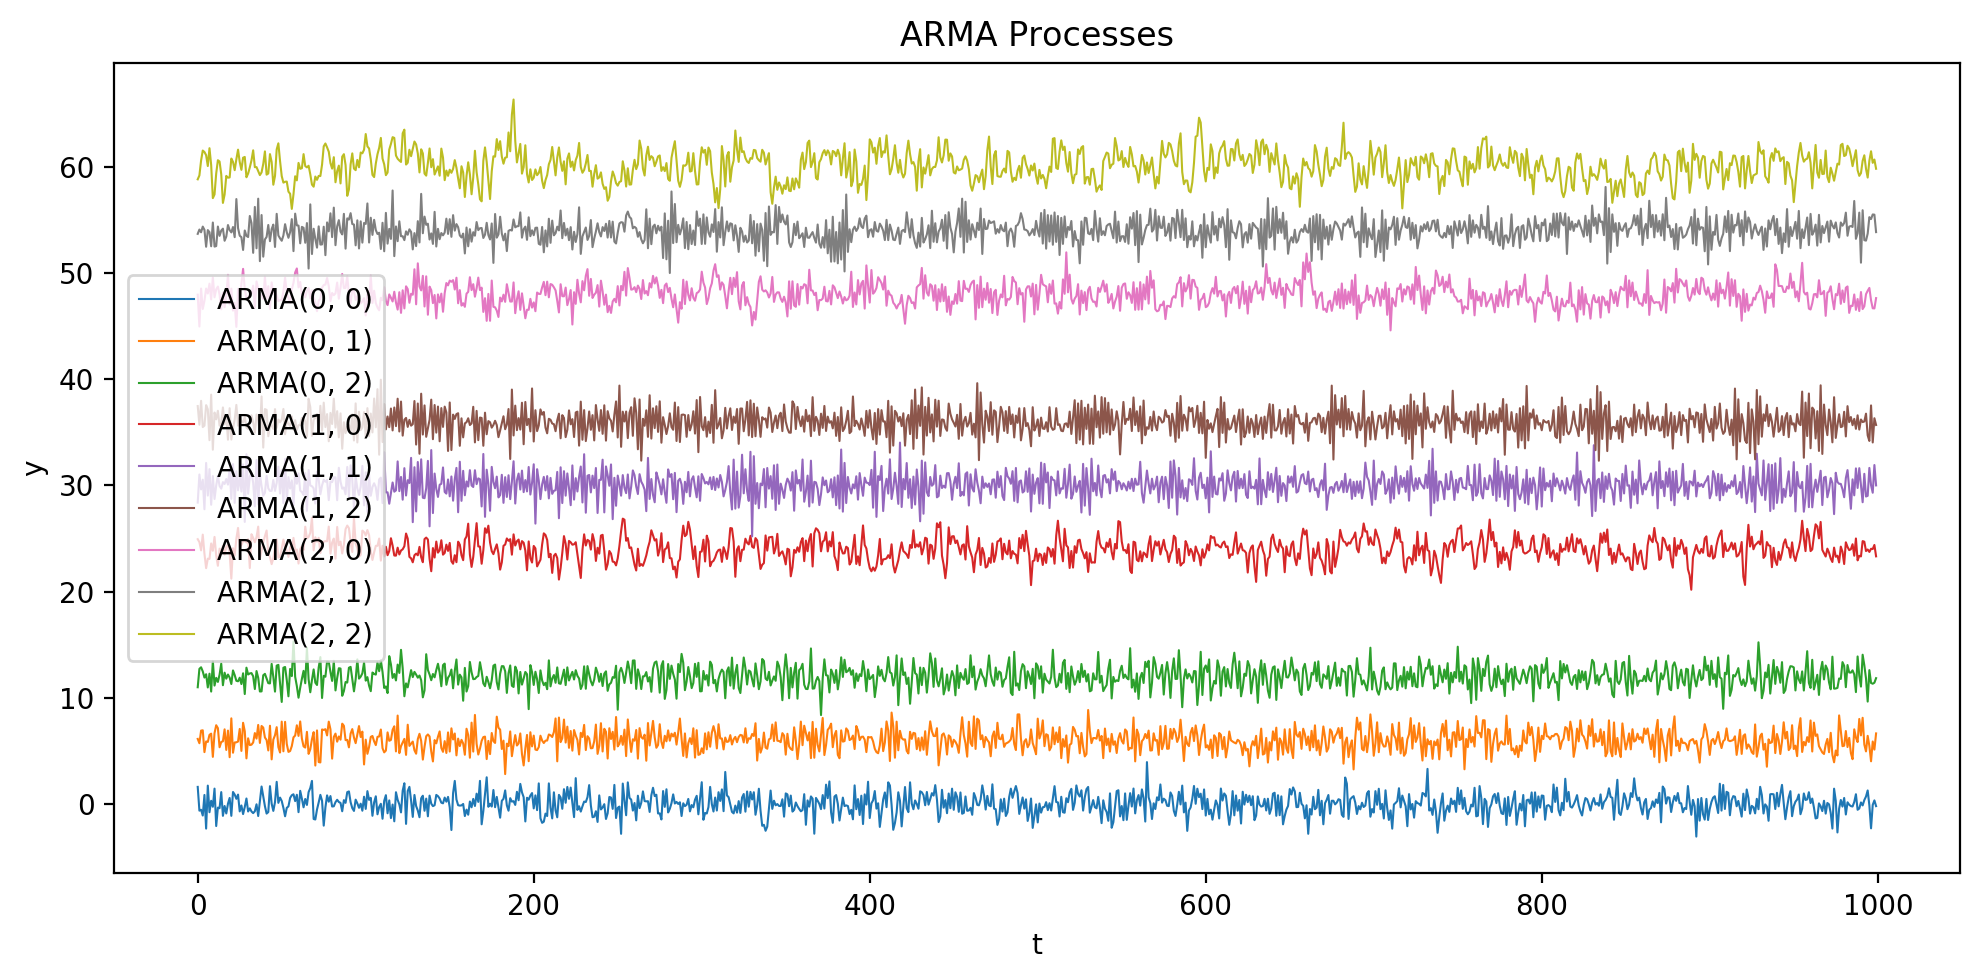

<IPython.core.display.Javascript object>

In [11]:
np.random.seed(1)

fig, ax = plt.subplots(dpi=200, figsize=(10, 5))

porders = np.arange(3)
qorders = np.arange(3)
t = np.arange(num_steps)

for p in porders:
    for q in qorders:
        alphas = np.random.uniform(low=-0.5, high=0.5, size=p)  # Random model parameters
        betas = np.random.uniform(low=-0.5, high=0.5, size=q)  # Random model parameters
        y = arma_process(num_steps, p, q, alphas, betas, c=c, sigma=sigma, mu=mu) + (p*(len(qorders)+1) + q) * 6
        sns.lineplot(t, y, ax=ax, label=f'ARMA{p, q}', linewidth=0.75)

ax.set(xlabel='t', ylabel='y', title='ARMA Processes')
ax.legend()
fig.tight_layout();

## Autoregressive Integrated Moving-Average (ARIMA) Models
An ARIMA model of order ($p$, $d$, $q$), denoted ARIMA($p$, $d$, $q$), is like an ARMA($p+d$, $q$) model where it is assumed that the polynomial $\left(1 - \sum_{i=1}^p \alpha_i L^i\right)$ has a unit root, i.e. a factor of $(1 - L)$ of multiplicity $d$.

An ARMA($p'$, $q$) model is written
$$
\left(1 - \sum_{i=1}^{p'} \alpha_i L^i \right)X_t = \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$
but with the polynomial factorization property, $(1-L)$ can be factored out $d$ times from the the polynomial on the LHS, giving
$$
\left(1 - \sum_{i=1}^{p'} \alpha_i L^i \right) = \left(1 - \sum_{i=1}^{p'-d} \gamma_i L^i \right)(1-L)^d
$$
The ARIMA($p$, $d$, $q$) model with $p = p' - d$ is thus written
$$
\left(1 - \sum_{i=1}^{p} \gamma_i L^i \right)(1-L)^d X_t = \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$
When there is a constant $c$ introduced into the model, then the ARIMA($p$, $d$, $q$) model is said to have drift:
$$
\left(1 - \sum_{i=1}^{p} \gamma_i L^i \right)(1-L)^d X_t = c + \left(1 + \sum_{i=1}^q \beta_i L^i \right) \epsilon_t
$$
giving a drift of $\frac{c}{1 - \sum_{i=1}^p \gamma_i}$.